In [81]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Datos Exp(2.7) y Exp(7.5) generados a partir del método F^-1:

In [115]:
data1=np.random.random(size=10000)
inv1=-np.log(1-data1)/2.7

data2=np.random.random(size=10000)
inv2=-np.log(1-data2)/7.5

## Histogramas de distribución de los datos generados a partir del método F^-1:

Text(0.5, 1.0, 'Exp(7.5)')

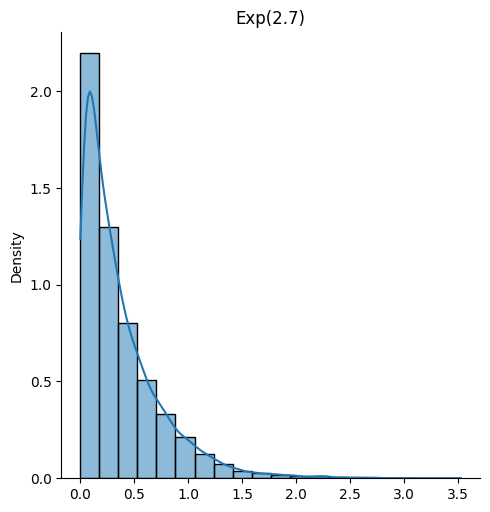

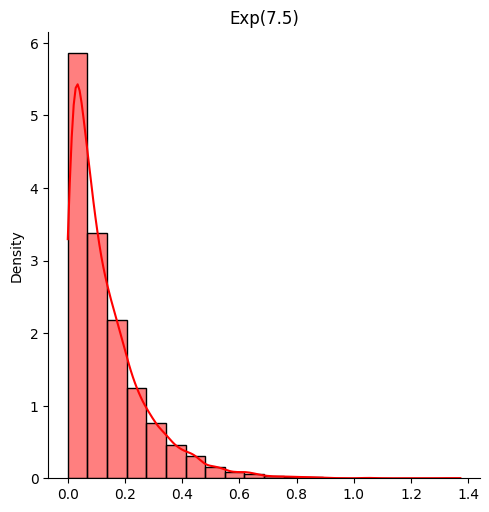

In [83]:
sns.displot(inv1, bins=20,label='simulación exponencial 2.7',stat="density",kde=True)
plt.title('Exp(2.7)')
#plt.savefig('Histograma27.png',bbox_inches="tight")
sns.displot(inv2, bins=20,label='simulación exponencial 7.5',color='red',stat="density",kde=True)
plt.title('Exp(7.5)')
#plt.savefig('Histograma75.png',bbox_inches="tight")

## Estimación de densidad de los datos de Exp(2.7) con la respectiva densidad de la distribución Exp(2.7):

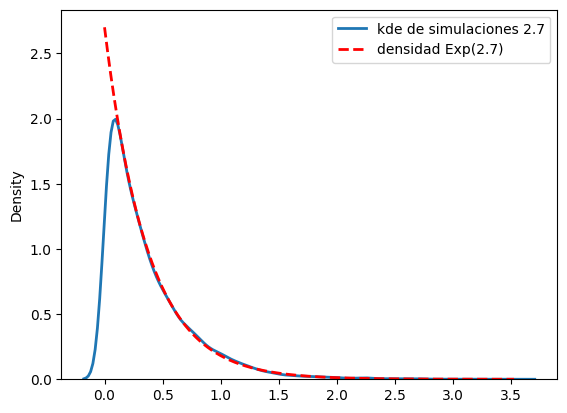

In [84]:
x1=np.linspace(0,np.amax(inv1),10000)
y1=2.7*np.exp(-2.7*x1)

sns.kdeplot(data=inv1, label='kde de simulaciones 2.7',linewidth=2)
plt.plot(x1,y1,label='densidad Exp(2.7)',linestyle='dashed',linewidth=2,color='red')
#plt.savefig('KDE27.png')
plt.legend(loc=1)

## Estimación de densidad de los datos de Exp(7.5) con la respectiva densidad de la distribución Exp(7.5):

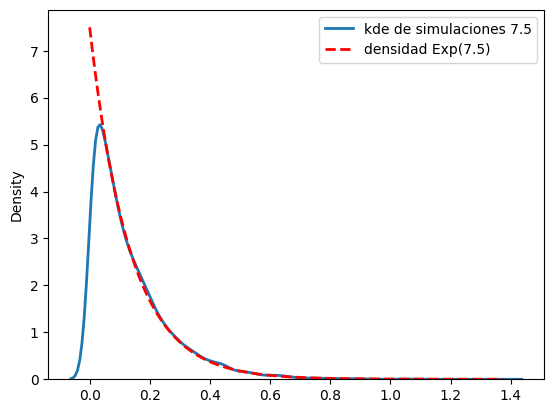

In [85]:
x2=np.linspace(0,np.amax(inv2),10000)
y2=7.5*np.exp(-7.5*x2)

sns.kdeplot(data=inv2, label='kde de simulaciones 7.5',linewidth=2)
plt.plot(x2,y2,label='densidad Exp(7.5)',linestyle='dashed',linewidth=2,color='red')
#plt.savefig('KDE75.png')
plt.legend(loc=1)

## q-q plot Exp(2.7):

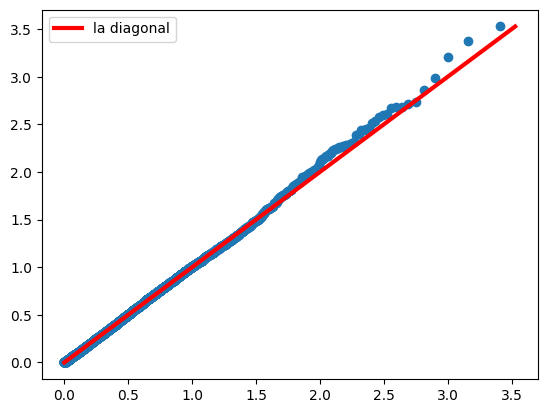

In [86]:
indices=np.linspace(0,0.9999,10000)
cuantiles1=-np.log(1-indices)/2.7
plt.scatter(cuantiles1,np.sort(inv1))
diag_x1=np.linspace(0,np.max(inv1),100)
diag_y1=np.linspace(0,np.max(inv1),100)
plt.plot(diag_x1,diag_y1, 'r', label='la diagonal',linewidth=3)
plt.legend(loc=2)
#plt.savefig('qqplot27.png')

## q-q plot Rayleigh(7.5):

<function matplotlib.pyplot.show(close=None, block=None)>

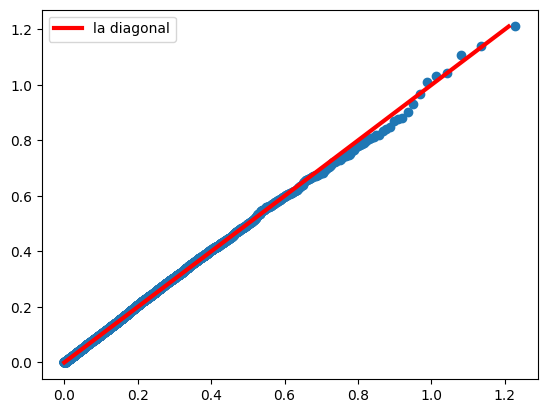

In [116]:
indices2=np.linspace(0,0.9999,10000)
cuantiles2=-np.log(1-indices2)/7.5
plt.scatter(cuantiles2,np.sort(inv2))
diag_x2=np.linspace(0,np.max(inv2),100)
diag_y2=np.linspace(0,np.max(inv2),100)
plt.plot(diag_x2,diag_y2,'r',linewidth=3, label='la diagonal')
plt.legend(loc=2)
plt.show
#plt.savefig('qqplot75.png')

## Función para generar los 500 valores de $\hat{\lambda}_1$ y $\hat{\lambda}_2$ para $\lambda=2.7$ que toma $n$ como parámetro:

In [88]:
def estimadores1(n):
    Muestras=[]
    for i in range(0,500):
        data=np.random.random(size=n)
        inv=-np.log(1-data)/2.7
        Muestras.append(inv)
    T1=[]
    for i in range(0,500):
        T1.append(1/np.average(Muestras[i]))
    T2=[]
    for i in range(0,500):
        T2.append(1/np.sqrt(np.var(Muestras[i])))
    return (T1,T2)

## Función para generar los 500 valores de $\hat{\lambda}_1$ y $\hat{\lambda}_2$ para $\lambda=7.5$ que toma $n$ como parámetro:

In [89]:
def estimadores2(n):
    Muestras=[]
    for i in range(0,500):
        data=np.random.random(size=n)
        inv=-np.log(1-data)/7.5
        Muestras.append(inv)
    T1=[]
    for i in range(0,500):
        T1.append(1/np.average(Muestras[i]))
    T2=[]
    for i in range(0,500):
        T2.append(1/np.sqrt(np.var(Muestras[i])))
    return (T1,T2)

## Boxplots de $\hat{\lambda}_1$ y $\hat{\lambda}_2$:

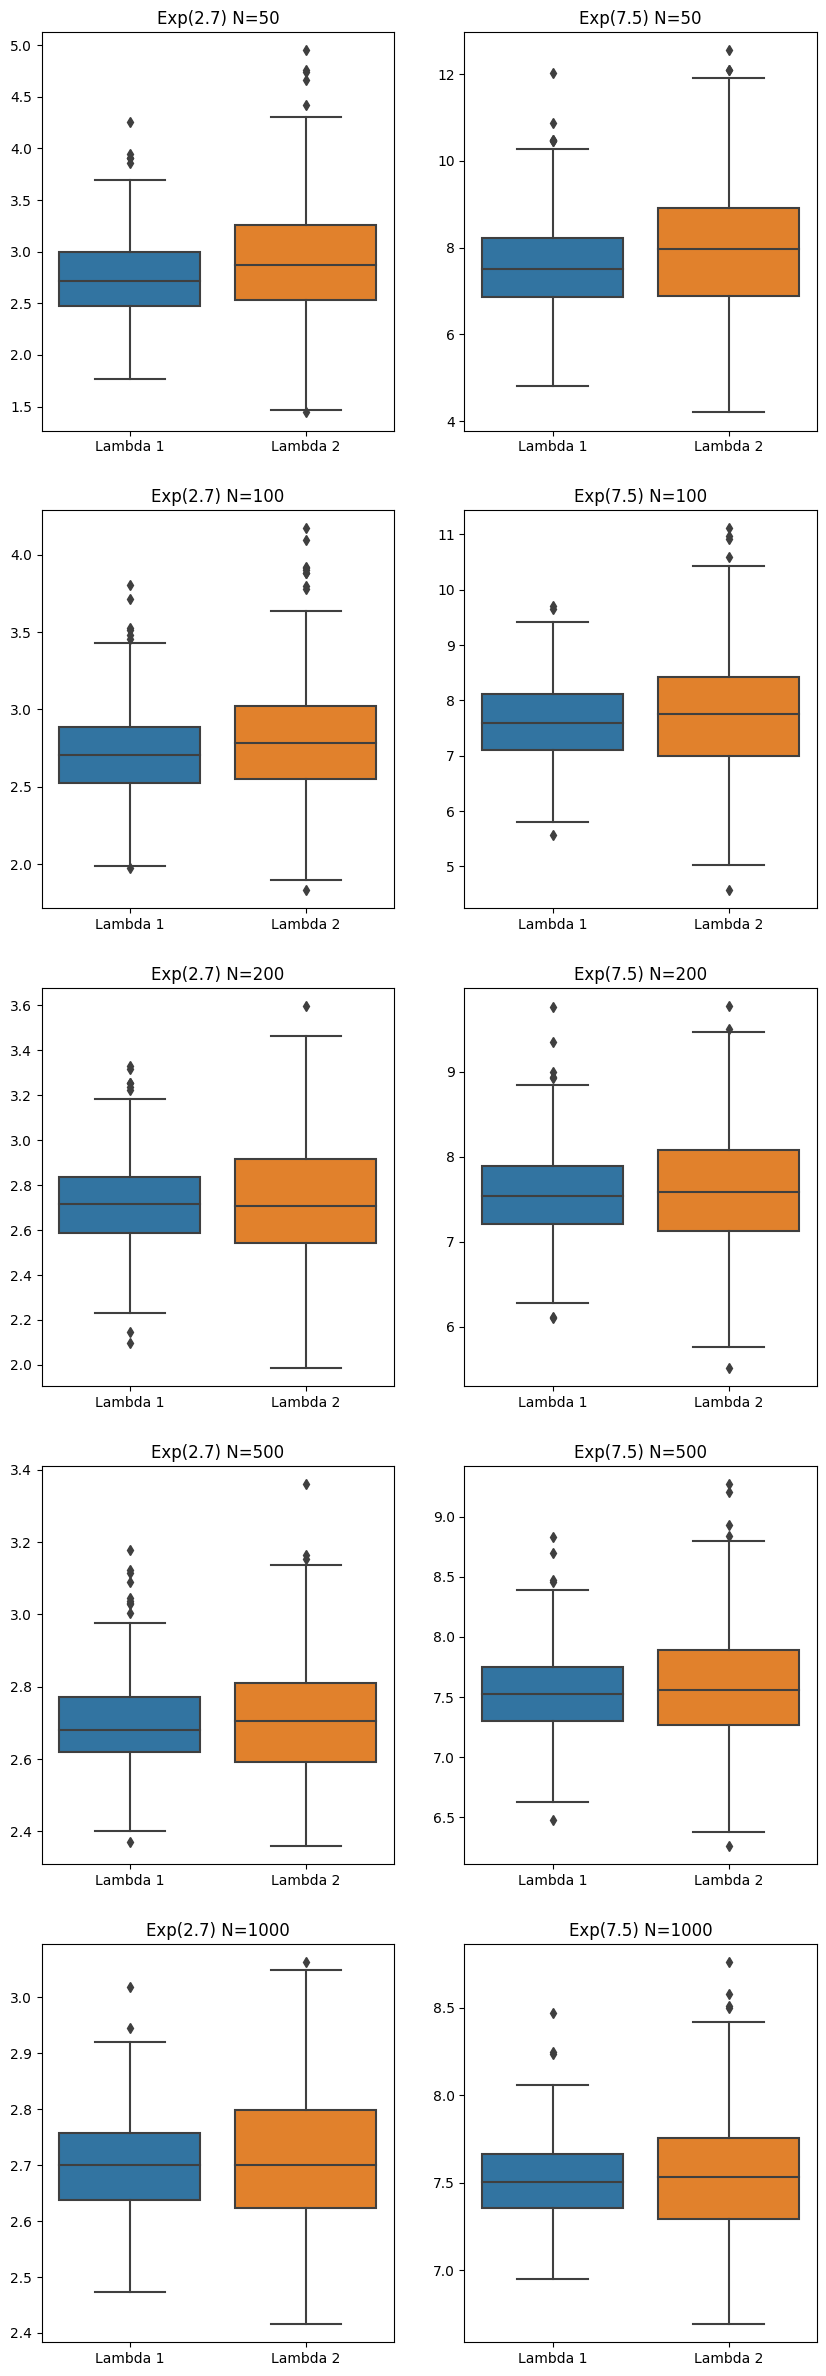

In [90]:
fig, axes = plt.subplots(5,2,figsize=(10, 30))
n=[50,100,200,500,1000]
succ1=[]
for i in range(0,5):
    succ1.append(estimadores1(n[i]))
    sns.boxplot(ax=axes[i][0],data=succ1[i])
    axes[i][0].set_xticklabels(['Lambda 1','Lambda 2'])
    axes[i][0].set_title('Exp(2.7) N='+str(n[i]))
succ2=[]
for i in range(0,5):
    succ2.append(estimadores2(n[i]))
    sns.boxplot(ax=axes[i][1],data=succ2[i])
    axes[i][1].set_xticklabels(['Lambda 1','Lambda 2'])
    axes[i][1].set_title('Exp(7.5) N='+str(n[i]))
#plt.savefig('Boxplots.png')

Para Exp(2.7)

succ1[0] es el vector (T1,T2) para N=50

succ1[1] es el vector (T1,T2) para N=100

etc

succ1[0][0] es el vector T1 para N=50

succ1[0][1] es el vector T2 para N=50

etc

succ2 es lo mismo pero para Exp(7.5)

## Estimación del sesgo y el ECM para $\lambda=2.7$:
Cada celda es de la forma:

Bias de $\hat{\lambda}_1$

ECM de $\hat{\lambda}_1$

Bias de $\hat{\lambda}_2$

ECM de $\hat{\lambda}_2$

para N=50,100,...

In [91]:
T1bias50=np.mean(succ1[0][0])-2.7
T1ecm50=T1bias50**2+np.var(succ1[0][0])
T2bias50=np.mean(succ1[0][1])-2.7
T2ecm50=T2bias50**2+np.var(succ1[0][1])
T1bias50,T1ecm50,T2bias50,T2ecm50

(0.05692960783891898,
 0.15516616853716816,
 0.19970430233004377,
 0.3405213652981714)

In [92]:
T1bias100=np.mean(succ1[1][0])-2.7
T1ecm100=T1bias100**2+np.var(succ1[1][0])
T2bias100=np.mean(succ1[1][1])-2.7
T2ecm100=T2bias100**2+np.var(succ1[1][1])
T1bias100,T1ecm100,T2bias100,T2ecm100

(0.026776599336331586,
 0.0817091489933937,
 0.10190906326126781,
 0.15390959725061362)

In [93]:
T1bias200=np.mean(succ1[2][0])-2.7
T1ecm200=T1bias200**2+np.var(succ1[2][0])
T2bias200=np.mean(succ1[2][1])-2.7
T2ecm200=T2bias200**2+np.var(succ1[2][1])
T1bias200,T1ecm200,T2bias200,T2ecm200

(0.02114340755054167,
 0.03739800276225487,
 0.0352179318619843,
 0.07370244943719248)

In [94]:
T1bias500=np.mean(succ1[3][0])-2.7
T1ecm500=T1bias500**2+np.var(succ1[3][0])
T2bias500=np.mean(succ1[3][1])-2.7
T2ecm500=T2bias500**2+np.var(succ1[3][1])
T1bias500,T1ecm500,T2bias500,T2ecm500

(-0.001180366372512065,
 0.014224088587956832,
 0.007125771228853051,
 0.02663850389666494)

In [95]:
T1bias1000=np.mean(succ1[4][0])-2.7
T1ecm1000=T1bias1000**2+np.var(succ1[4][0])
T2bias1000=np.mean(succ1[4][1])-2.7
T2ecm1000=T2bias1000**2+np.var(succ1[4][1])
T1bias1000,T1ecm1000,T2bias1000,T2ecm1000

(0.0012396488826014185,
 0.007377393960789663,
 0.007188067876561455,
 0.01584031236716088)

## Eficiencia relativa  $\text{Eff}(\hat{\lambda}_1,\hat{\lambda}_2)$ como estimadores de $\lambda=2.7$ para $n=50,100,...$ :

In [96]:
T1T2Eff50=np.var(succ1[0][1])/np.var(succ1[0][0])
T1T2Eff100=np.var(succ1[1][1])/np.var(succ1[1][0])
T1T2Eff200=np.var(succ1[2][1])/np.var(succ1[2][0])
T1T2Eff500=np.var(succ1[3][1])/np.var(succ1[3][0])
T1T2Eff1000=np.var(succ1[4][1])/np.var(succ1[4][0])
T1T2Eff50,T1T2Eff100,T1T2Eff200,T1T2Eff500,T1T2Eff1000

(1.9788657846399271,
 1.7720744236645256,
 1.9610356136315163,
 1.8693873894436939,
 2.1405842808437434)

## Gráficas de $\ln(n) \text{ vs } \ln(\text{ECM}(\hat{\lambda}_1))$ y $\ln(n) \text{ vs } \ln(\text{ECM}(\hat{\lambda}_2))$ respectivamente:

(-1.0320664304808893, 2.197107248116439)

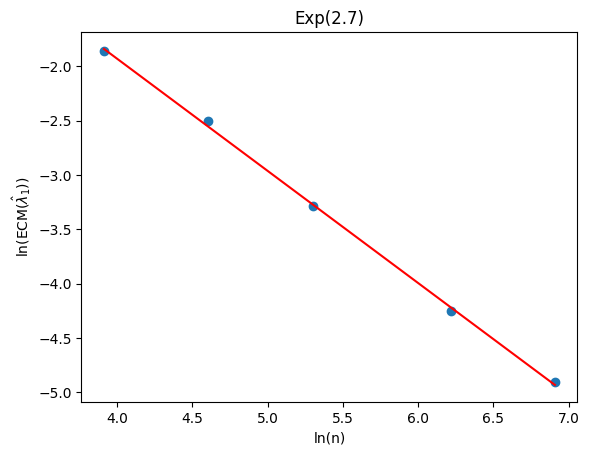

In [97]:
x1=[np.log(50),np.log(100),np.log(200),np.log(500),np.log(1000)]
y1=np.log([T1ecm50,T1ecm100,T1ecm200,T1ecm500,T1ecm1000])
a,b=np.polyfit(x1,y1,1)
x=np.linspace(np.log(50),np.log(1000),100)
y=a*x+b
plt.scatter(x1,y1)
plt.xlabel('ln(n)')
plt.ylabel(r"ln(ECM($\hat{\lambda}_1$))")
plt.title('Exp(2.7)')
plt.plot(x,y,color='r')
a,b
#plt.savefig('ln(n)vsln(ECM)27 T1.png')

(-1.0381439851482628, 2.927682099544074)

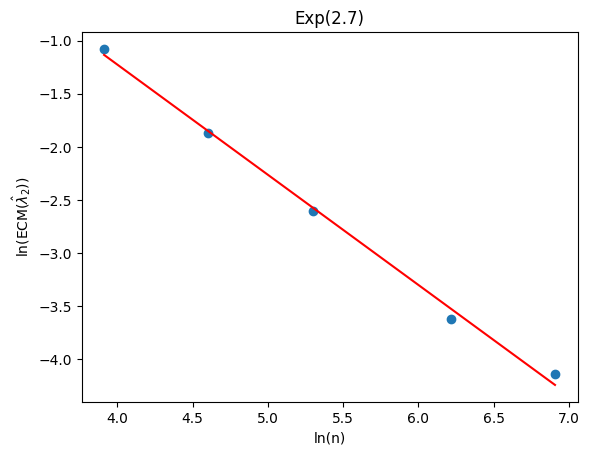

In [98]:
x1=[np.log(50),np.log(100),np.log(200),np.log(500),np.log(1000)]
y1=np.log([T2ecm50,T2ecm100,T2ecm200,T2ecm500,T2ecm1000])
a,b=np.polyfit(x1,y1,1)
x=np.linspace(np.log(50),np.log(1000),100)
y=a*x+b
plt.scatter(x1,y1)
plt.xlabel('ln(n)')
plt.ylabel(r"ln(ECM($\hat{\lambda}_2$))")
plt.title('Exp(2.7)')
plt.plot(x,y,color='r')
a,b
#plt.savefig('ln(n)vsln(ECM)27 T2.png')

## Estimación del sesgo y el ECM para $\lambda=7.5$:
Cada celda es de la forma:

Bias de $\hat{\lambda}_1$

ECM de $\hat{\lambda}_1$

Bias de $\hat{\lambda}_2$

ECM de $\hat{\lambda}_2$

para N=50,100,...

In [99]:
T1bias50=np.mean(succ2[0][0])-7.5
T1ecm50=T1bias50**2+np.var(succ2[0][0])
T2bias50=np.mean(succ2[0][1])-7.5
T2ecm50=T2bias50**2+np.var(succ2[0][1])
T1bias50,T1ecm50,T2bias50,T2ecm50

(0.11476891487758767,
 1.1253593865434781,
 0.46718848654175904,
 2.2399454733426376)

In [100]:
T1bias100=np.mean(succ2[1][0])-7.5
T1ecm100=T1bias100**2+np.var(succ2[1][0])
T2bias100=np.mean(succ2[1][1])-7.5
T2ecm100=T2bias100**2+np.var(succ2[1][1])
T1bias100,T1ecm100,T2bias100,T2ecm100

(0.09579771239716539,
 0.5783896185069229,
 0.23224832446340749,
 1.1527781374836015)

In [101]:
T1bias200=np.mean(succ2[2][0])-7.5
T1ecm200=T1bias200**2+np.var(succ2[2][0])
T2bias200=np.mean(succ2[2][1])-7.5
T2ecm200=T2bias200**2+np.var(succ2[2][1])
T1bias200,T1ecm200,T2bias200,T2ecm200

(0.06108646174630383,
 0.29119338313279136,
 0.11912748939465967,
 0.5463176690755244)

In [102]:
T1bias500=np.mean(succ2[3][0])-7.5
T1ecm500=T1bias500**2+np.var(succ2[3][0])
T2bias500=np.mean(succ2[3][1])-7.5
T2ecm500=T2bias500**2+np.var(succ2[3][1])
T1bias500,T1ecm500,T2bias500,T2ecm500

(0.028659604991586818,
 0.117810868327413,
 0.07645530636059839,
 0.22703833457999528)

In [103]:
T1bias1000=np.mean(succ2[4][0])-7.5
T1ecm1000=T1bias1000**2+np.var(succ2[4][0])
T2bias1000=np.mean(succ2[4][1])-7.5
T2ecm1000=T2bias1000**2+np.var(succ2[4][1])
T1bias1000,T1ecm1000,T2bias1000,T2ecm1000

(0.013220422191666081,
 0.05537391638172697,
 0.041322324551840595,
 0.11135058802581782)

## Eficiencia relativa  $\text{Eff}(\hat{\lambda}_1,\hat{\lambda}_2)$ como estimadores de $\lambda=7.5$ para $n=50,100,...$ :

In [104]:
T1T2Eff50=np.var(succ2[0][1])/np.var(succ2[0][0])
T1T2Eff100=np.var(succ2[1][1])/np.var(succ2[1][0])
T1T2Eff200=np.var(succ2[2][1])/np.var(succ2[2][0])
T1T2Eff500=np.var(succ2[3][1])/np.var(succ2[3][0])
T1T2Eff1000=np.var(succ2[4][1])/np.var(succ2[4][0])
T1T2Eff50,T1T2Eff100,T1T2Eff200,T1T2Eff500,T1T2Eff1000

(1.817751433812951,
 1.9304548193671802,
 1.8511199045085227,
 1.8907075375559836,
 1.9863182621744413)

## Gráficas de $\ln(n) \text{ vs } \ln(\text{ECM}(\hat{\lambda}_1))$ y $\ln(n) \text{ vs } \ln(\text{ECM}(\hat{\lambda}_2))$ respectivamente:

(-1.001913154171428, 4.058783213455615)

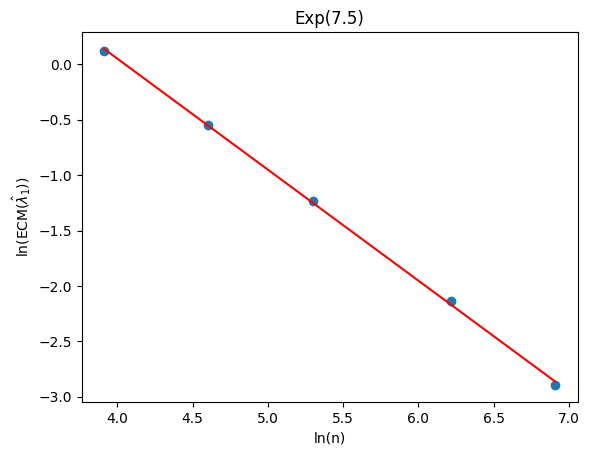

In [105]:
x1=[np.log(50),np.log(100),np.log(200),np.log(500),np.log(1000)]
y1=np.log([T1ecm50,T1ecm100,T1ecm200,T1ecm500,T1ecm1000])
a,b=np.polyfit(x1,y1,1)
x=np.linspace(np.log(50),np.log(1000),100)
y=a*x+b
plt.scatter(x1,y1)
plt.xlabel('ln(n)')
plt.ylabel(r"ln(ECM($\hat{\lambda}_1$))")
plt.title('Exp(7.5)')
plt.plot(x,y,color='r')
a,b
#plt.savefig('ln(n)vsln(ECM)75 T1.png')

(-1.003111574115632, 4.737611356892435)

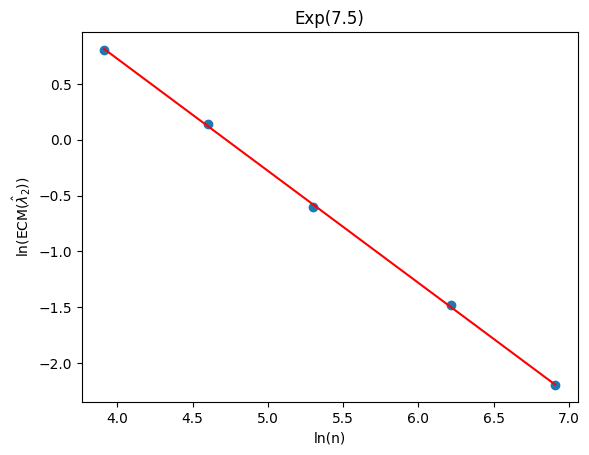

In [106]:
x1=[np.log(50),np.log(100),np.log(200),np.log(500),np.log(1000)]
y1=np.log([T2ecm50,T2ecm100,T2ecm200,T2ecm500,T2ecm1000])
a,b=np.polyfit(x1,y1,1)
x=np.linspace(np.log(50),np.log(1000),100)
y=a*x+b
plt.scatter(x1,y1)
plt.xlabel('ln(n)')
plt.ylabel(r"ln(ECM($\hat{\lambda}_2$))")
plt.title('Exp(7.5)')
plt.plot(x,y,color='r')
a,b
#plt.savefig('ln(n)vsln(ECM)75 T2.png')